# Multivariate with Prophet


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/multi.png" width="1600">


In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv

--2022-12-01 17:39:57--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.74
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1867062 (1.8M) [text/csv]
Saving to: ‘nyc_energy_consumption.csv’

nyc_energy_consumpt 100%[===================>]   1.78M  3.37MB/s    in 0.5s    

2022-12-01 17:39:59 (3.37 MB/s) - ‘nyc_energy_consumption.csv’ saved [1867062/1867062]



In [4]:
df = pd.read_csv('nyc_energy_consumption.csv')
df['timeStamp']= pd.to_datetime(df['timeStamp'])
df

timeStamp  demand  precip   temp
0     2012-01-01 00:00:00  4937.5  0.0000  46.13
1     2012-01-01 01:00:00  4752.1  0.0000  45.89
2     2012-01-01 02:00:00  4542.6  0.0000  45.04
3     2012-01-01 03:00:00  4357.7  0.0000  45.03
4     2012-01-01 04:00:00  4275.5  0.0000  42.61
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [6]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [7]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [8]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_traces(line_color='#000080', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [9]:
fig = px.line(df, x = 'timeStamp',y = 'temp',title = 'NYC_Temperature')

fig.update_traces(line_color='#00FF00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [10]:
fig = px.line(df, x = 'timeStamp',y = 'precip',title = 'NYC_Precipitation')

fig.update_traces(line_color='#ff8c00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [11]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [12]:
ny_df =df.set_index('timeStamp')

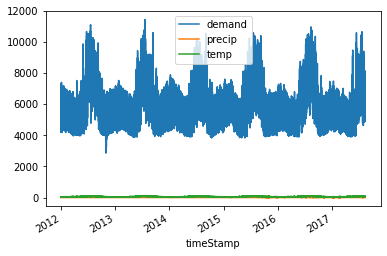

In [13]:
ny_df.plot();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd163527e50>,
      dtype=object)

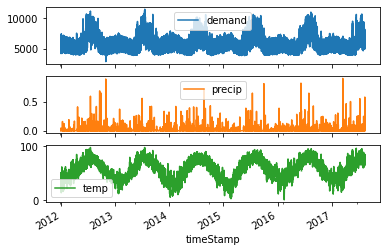

In [14]:
ny_df.plot(subplots = True)

## Resample by Day --> Mean

In [15]:
ny_df_daily = ny_df.resample('D').mean()

In [16]:
ny_df_daily['demand']= ny_df_daily['demand'].fillna(method = 'ffill')
ny_df_daily['temp']= ny_df_daily['temp'].fillna(method = 'ffill')
ny_df_daily['precip']= ny_df_daily['precip'].fillna(method = 'ffill')

ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')
ny_df_final

ds            y       temp
0    2012-01-01  4954.833333  46.510000
1    2012-01-02  5302.954167  40.496667
2    2012-01-03  6095.512500  26.672500
3    2012-01-04  6336.266667  20.585000
4    2012-01-05  6130.245833  33.577500
...         ...          ...        ...
2046 2017-08-08  6471.626042  71.039167
2047 2017-08-09  6811.112167  73.852500
2048 2017-08-10  5582.297000  75.217500
2049 2017-08-11  5582.297000  72.767917
2050 2017-08-12  5582.297000  69.771429

[2051 rows x 3 columns]

In [17]:
ny_df_final['month']= ny_df_final['ds'].dt.month
ny_df_final

ds            y       temp  month
0    2012-01-01  4954.833333  46.510000      1
1    2012-01-02  5302.954167  40.496667      1
2    2012-01-03  6095.512500  26.672500      1
3    2012-01-04  6336.266667  20.585000      1
4    2012-01-05  6130.245833  33.577500      1
...         ...          ...        ...    ...
2046 2017-08-08  6471.626042  71.039167      8
2047 2017-08-09  6811.112167  73.852500      8
2048 2017-08-10  5582.297000  75.217500      8
2049 2017-08-11  5582.297000  72.767917      8
2050 2017-08-12  5582.297000  69.771429      8

[2051 rows x 4 columns]

In [18]:
fig = px.line(ny_df_final, x = 'ds',y = 'y',title = 'NYC_Energy_Consumption Daily', hover_data=['temp','month'])

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [19]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
             min        max       mean
month                                 
1       9.507917  55.420455  33.432140
2       9.015000  59.360000  34.517758
3      20.291667  67.878333  41.419884
4      33.045833  72.992083  52.600204
5      48.090833  82.576250  62.543994
6      52.405833  86.916667  71.334418
7      66.417083  89.606667  77.595627
8      68.042083  87.426250  75.525947
9      57.274583  84.448750  69.550306
10     42.106250  74.277500  58.642895
11     27.172500  67.606250  47.225638
12     22.429583  64.735000  41.520068

In [20]:
ny_df_final[['y','temp']].corr()

y      temp
y     1.000000  0.560138
temp  0.560138  1.000000

In [21]:
ny_df_final.query('temp>80')[['y','temp']].corr()

y      temp
y     1.000000  0.552918
temp  0.552918  1.000000

In [ ]:
ny_df_final.query('temp<=80')[['y','temp']].corr()

y      temp
y     1.000000  0.469771
temp  0.469771  1.000000

In [22]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

In [23]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)
ny_df_final

ds            y       temp  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000      1            0           0
1    2012-01-02  5302.954167  40.496667      1            0           0
2    2012-01-03  6095.512500  26.672500      1            0           0
3    2012-01-04  6336.266667  20.585000      1            0           0
4    2012-01-05  6130.245833  33.577500      1            0           0
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[2051 rows x 6 columns]

In [24]:
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[(ny_df_final['ds']>'2017-04-30')]

print(train.shape)
print(test.shape)

(1947, 6)
(104, 6)


In [25]:
test

ds            y       temp  month  summer_temp  month_bins
1947 2017-05-01  5417.231583  60.300833      5            0           1
1948 2017-05-02  5697.950042  67.537917      5            0           1
1949 2017-05-03  5354.628500  59.413333      5            0           1
1950 2017-05-04  5235.704833  54.877083      5            0           1
1951 2017-05-05  5358.639500  55.720833      5            0           1
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[104 rows x 6 columns]

## Multivariate as Multiple-Regressor

In [26]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True
                )

# add regressor
model.add_regressor('summer_temp',standardize=False)
model.add_regressor('month_bins',standardize=False,mode='multiplicative')

model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/v1mo_sas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/3hixe6au.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98590', 'data', 'file=/tmp/tmphaxn3cwd/v1mo_sas.json', 'init=/tmp/tmphaxn3cwd/3hixe6au.json', 'output', 'file=/tmp/tmphaxn3cwd/prophet_modelgk2o6_px/prophet_model-20221201175226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
model.params

OrderedDict([('lp__', array([[5340.02]])),
             ('k', array([[0.157379]])),
             ('m', array([[0.588516]])),
             ('delta',
              array([[-5.39063e-08, -2.90602e-05, -1.94259e-01, -2.06421e-07,
                       2.46762e-08,  1.33189e-02,  5.11879e-03,  6.26422e-03,
                       3.89307e-04, -5.85004e-08, -5.74817e-08, -4.08120e-02,
                      -3.63225e-04, -5.44604e-08,  1.49435e-01,  5.82327e-08,
                      -6.93960e-08, -1.03703e-01, -4.95060e-02, -1.74769e-07,
                      -1.23220e-08,  9.32726e-08,  3.95262e-02,  3.19612e-02,
                      -3.19256e-08]])),
             ('sigma_obs', array([[0.0388042]])),
             ('beta',
              array([[-0.0358753 , -0.0591084 ,  0.049269  ,  0.0401597 , -0.00949112,
                      -0.00175973, -0.00787977, -0.00253544,  0.00335328, -0.00585968,
                       0.00140943,  0.00306399, -0.00530103, -0.00381198,  0.00332359,
           

In [28]:
future = model.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [29]:
future['summer_temp']=ny_df_final['summer_temp']
future['month_bins']=ny_df_final['month_bins']
future

ds  summer_temp  month_bins
0    2012-01-01            0           0
1    2012-01-02            0           0
2    2012-01-03            0           0
3    2012-01-04            0           0
4    2012-01-05            0           0
...         ...          ...         ...
2046 2017-08-08            0           1
2047 2017-08-09            0           1
2048 2017-08-10            0           1
2049 2017-08-11            0           1
2050 2017-08-12            0           1

[2051 rows x 3 columns]

In [30]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7384.558014  6604.242842  8085.642471
2047 2017-08-09  7395.279401  6643.809151  8205.302919
2048 2017-08-10  7365.524068  6570.840357  8151.964638
2049 2017-08-11  7315.246186  6605.811230  8037.157477
2050 2017-08-12  6734.340966  5972.078380  7481.413320

In [31]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="Energy Demand",
                  xaxis_title="Data",
                  title="NYC Energy Demand",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

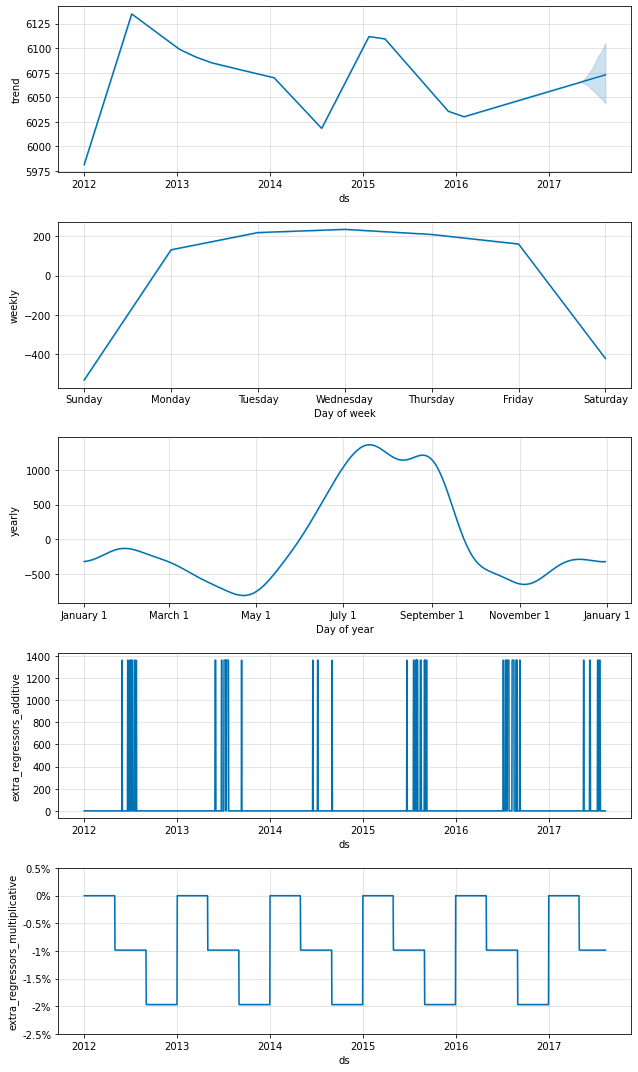

In [32]:
fig2 = model.plot_components(forecast)

In [33]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_results = cross_validation(model = model,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/l68bofnn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/179mmekw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77706', 'data', 'file=/tmp/tmphaxn3cwd/l68bofnn.json', 'init=/tmp/tmphaxn3cwd/179mmekw.json', 'output', 'file=/tmp/tmphaxn3cwd/prophet_modelpxz_rggb/prophet_model-20221201175422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/gw8xacxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphaxn3cwd/uttnb4ay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  200666.805296  447.958486  348.485857  0.061752   
1    37 days 00:00:00  206636.883076  454.573298  355.290975  0.062896   
2    37 days 12:00:00  207877.570669  455.935928  357.626089  0.063290   
3    38 days 00:00:00  211962.571350  460.393931  361.721191  0.063709   
4    38 days 12:00:00  214153.448541  462.767165  365.592353  0.064325   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  145208.337869  381.062118  317.573518  0.058038   
654 363 days 12:00:00  145782.334730  381.814529  317.597945  0.058042   
655 364 days 00:00:00  148470.755000  385.319030  319.941311  0.058678   
656 364 days 12:00:00  148095.196818  384.831388  319.060918  0.058539   
657 365 days 00:00:00  142176.591782  377.063114  314.482428  0.058114   

        mdape     smape  coverage  
0    0.051512  0.061615  0.906593  
1    0.051670  0.062725  0.901099  
2    0.052777  0.063134  0.901099  
3    0.054007  0.063565  0.895604  
4    0.054332  0.064199  0.895604  
..        ...       ...       ...  
653  0.057377  0.058105  0.983516  
654  0.057377  0.058154  0.983516  
655  0.058667  0.058817  0.978022  
656  0.058127  0.058714  0.978022  
657  0.058127  0.058208  0.983516  

[658 rows x 8 columns]

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



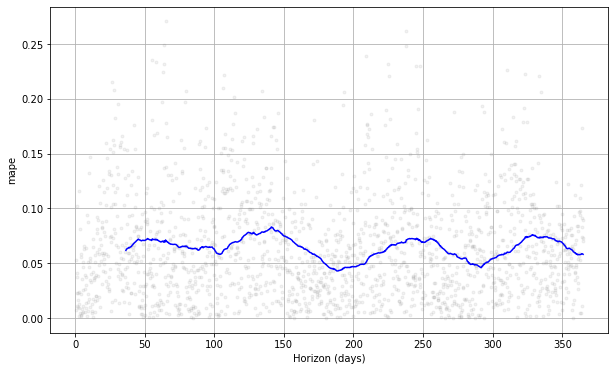

In [34]:
from prophet.plot import plot_cross_validation_metric

fig3 = plot_cross_validation_metric(cv_results,metric='mape')

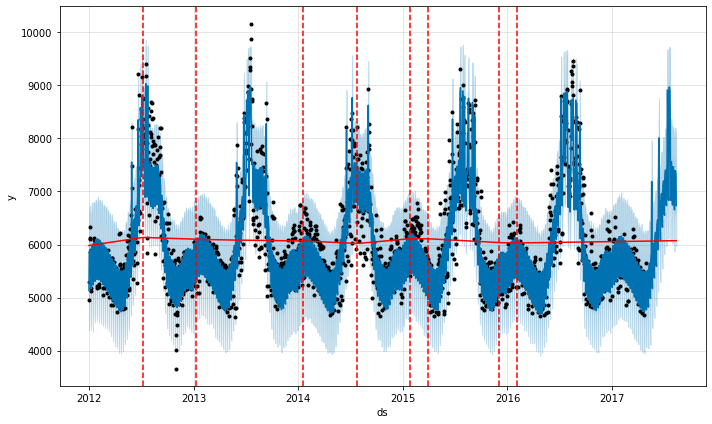

In [35]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast)

In [36]:
deltas = model.params['delta'].mean(0)
deltas

array([-5.39063e-08, -2.90602e-05, -1.94259e-01, -2.06421e-07,
        2.46762e-08,  1.33189e-02,  5.11879e-03,  6.26422e-03,
        3.89307e-04, -5.85004e-08, -5.74817e-08, -4.08120e-02,
       -3.63225e-04, -5.44604e-08,  1.49435e-01,  5.82327e-08,
       -6.93960e-08, -1.03703e-01, -4.95060e-02, -1.74769e-07,
       -1.23220e-08,  9.32726e-08,  3.95262e-02,  3.19612e-02,
       -3.19256e-08])

In [37]:
range(len(deltas))

range(0, 25)

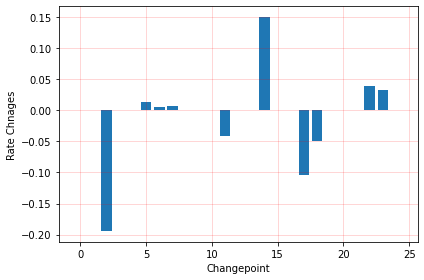

In [38]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points

In [39]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]